#📌 Extracción

In [12]:
# cargar archivo json alojado en GitHub
import pandas as pd

url = 'https://raw.githubusercontent.com/egcasass/challenge2-data-science-LATAM/d7afcac55b97809a67b89b005afbf5773e67fd47/TelecomX_Data.json'
df = pd.read_json(url)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [13]:
# para revisar las columnas
columnas = list(df.columns)
print(columnas)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#🔧 Transformación

In [14]:
# normalizar las columnas anidadas y agregarlas al df principal
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# eliminar las columnas anidadas originales
df  = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# concatenar todo en uno
df_final = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)

df_final.tail(500)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6767,9337-SRRNI,No,Male,0,No,Yes,66,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.30,1673.8
6768,9339-FIIJL,No,Male,0,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.95,6151.9
6769,9342-VNIMQ,No,Male,0,No,No,33,Yes,Yes,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.65,1665.2
6770,9347-AERRL,No,Male,0,Yes,No,23,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,486.2
6771,9348-ROUAI,No,Female,0,Yes,Yes,59,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),90.30,5194.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [15]:
# estandarizando datos
df_final['Churn']=df_final['Churn'].replace('','No')
df_final['MultipleLines']=df_final['MultipleLines'].replace('No phone service','No')
df_final['InternetService']=df_final['InternetService'].replace('DSL','Yes').replace('Fiber optic','Yes')
df_final=df_final.replace('No internet service','No')
df_final['PaymentMethod']=df_final['PaymentMethod'].str.replace(' (automatic)','')

In [16]:
df_final.tail(100)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7167,9851-KIELU,Yes,Male,0,No,No,10,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.10,1043.3
7168,9851-QXEEQ,Yes,Male,0,No,No,41,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.70,4346.4
7169,9853-JFZDU,No,Female,0,Yes,No,35,Yes,No,Yes,...,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.1
7170,9860-LISIZ,No,Female,0,No,No,34,Yes,No,No,...,No,No,No,No,No,Month-to-month,No,Mailed check,20.35,673.2
7171,9861-PDSZP,No,Female,0,No,No,72,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card,108.05,7806.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,Yes,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Yes,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [17]:
# ver la estructura de las columnas
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [18]:
# revisar los valores unicos de las columnas
for col in df_final.columns:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].unique())



Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes']

Valores únicos en 'gender':
['Female' 'Male']

Valores únicos en 'SeniorCitizen':
[0 1]

Valores únicos en 'Partner':
['Yes' 'No']

Valores únicos en 'Dependents':
['Yes' 'No']

Valores únicos en 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService':
['Yes' 'No']

Valores únicos en 'MultipleLines':
['No' 'Yes']

Valores únicos en 'InternetService':
['Yes' 'No']

Valores únicos en 'OnlineSecurity':
['No' 'Yes']

Valores únicos en 'OnlineBackup':
['Yes' 'No']

Valores únicos en 'DeviceProtection':
['No' 'Yes']

Valores únicos en 'TechSupport':
['Yes' 'No']

Valores únicos en 'StreamingTV':
['Yes' 'No']

Valores únicos en

In [19]:
# si Churn es igual a '' entonces es "No"
df_final['Churn']=df_final['Churn'].replace('','No')

# estandarización de columnas específicas
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

# Unifica tecnologías de internet bajo "Yes" y luego reemplaza sin servicio por "No"
df_final['InternetService'] = df_final['InternetService'].replace({
    'DSL': 'Yes',
    'Fiber optic': 'Yes',
    'No internet service': 'No'
})

# Reemplaza en todo el DataFrame el valor 'No internet service' por 'No' (para otras columnas también)
df_final = df_final.replace('No internet service', 'No')

# Limpieza de texto en método de pago: elimina " (automatic)" si existe
df_final['PaymentMethod'] = df_final['PaymentMethod'].str.replace(r' \(automatic\)', '', regex=True)

In [20]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Yes,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Yes,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,Yes,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Yes,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [21]:
# revisar nuevamente los valores unicos de las columnas
for col in df_final.columns:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].unique())



Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes']

Valores únicos en 'gender':
['Female' 'Male']

Valores únicos en 'SeniorCitizen':
[0 1]

Valores únicos en 'Partner':
['Yes' 'No']

Valores únicos en 'Dependents':
['Yes' 'No']

Valores únicos en 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'PhoneService':
['Yes' 'No']

Valores únicos en 'MultipleLines':
['No' 'Yes']

Valores únicos en 'InternetService':
['Yes' 'No']

Valores únicos en 'OnlineSecurity':
['No' 'Yes']

Valores únicos en 'OnlineBackup':
['Yes' 'No']

Valores únicos en 'DeviceProtection':
['No' 'Yes']

Valores únicos en 'TechSupport':
['Yes' 'No']

Valores únicos en 'StreamingTV':
['Yes' 'No']

Valores únicos en

In [22]:
# transformar los Yes o No en 1 o 0

for col in df_final.columns:
    df_final[col] = df_final[col].replace({
        'Yes': 1,
        'No': 0,
    })

/tmp/ipython-input-22-2509415379.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].replace({


In [24]:
# Importar Numpy
import numpy as np

In [25]:
# Reemplazar strings vacíos y espacios por NaN Charges.Total

df_final['Charges.Total'] = df_final['Charges.Total'].replace([' ', ''], np.nan)

In [26]:
# cambiar a datos decimales la columna Charges.Total

df_final['Charges.Total'] = df_final['Charges.Total'].astype(np.float64)


In [27]:
# crear columna Cuentas_Diarias
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [28]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [29]:
# renombrar las columnas para mejor entendimiento
df_final = df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Antiguedad',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Lineas_Multiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Monto_Mensual',
    'Charges.Total': 'Monto_Total'
})


In [30]:
df_final.head()


,ID_Cliente,Churn,Genero,AdultoMayor,Pareja,Dependientes,Meses_Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Monto_Mensual,Monto_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [31]:
# análisis descriptivo de los datos
df_final.describe()

,Churn,AdultoMayor,Pareja,Dependientes,Meses_Antiguedad,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,Seguridad_En_Linea,Respaldo_En_Linea,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Factura_Digital,Monto_Mensual,Monto_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.782441,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.412614,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [32]:
# importar para visualización de datos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


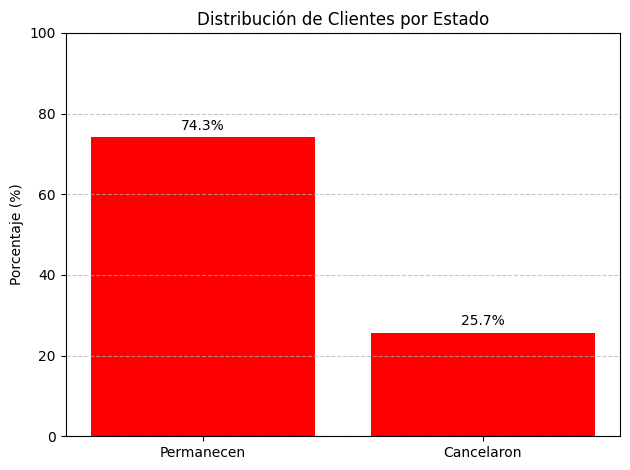

In [75]:
# cálculo del porcentaje de Churn y permanencia
churn = df_final['Churn'].value_counts(normalize=True) * 100

# declaración de ambas categorías
churn = churn.reindex([0, 1], fill_value=0)
churn.index = ['Permanecen', 'Cancelaron']

# graficamos
plt.bar(churn.index, churn.values, color="red")

# estética
plt.title('Distribución de Clientes por Estado')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# mostrar % sobre cada barra
for index, value in enumerate(churn.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

# exportar gráfico
plt.savefig('plt1.churn_estado.png',transparent=True,dpi=300,bbox_inches='tight')

plt.tight_layout()
plt.show()

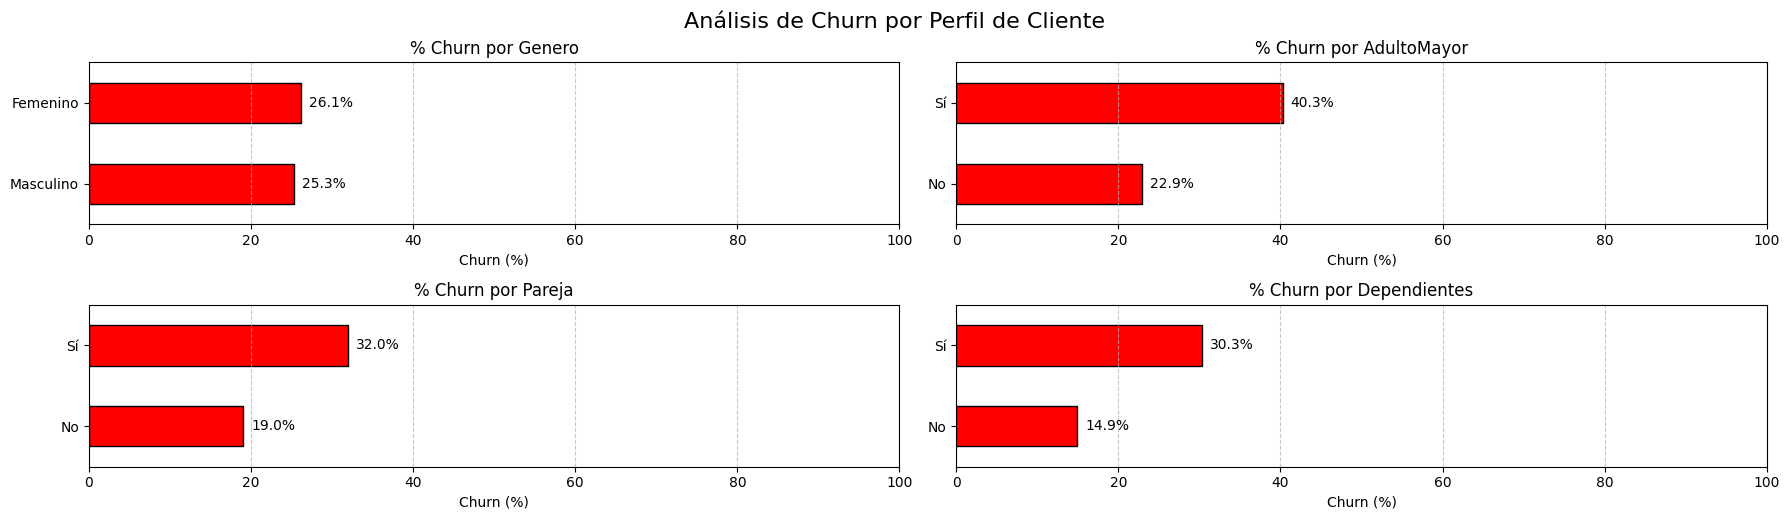

In [76]:
# Variables Análisis de Churn por Perfil de Cliente
variables = ['Genero', 'AdultoMayor', 'Pareja', 'Dependientes']

# Diccionario de traducciones
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear figura y ejes (filas, columnas)
fig, axes = plt.subplots(2, 2, figsize=(18, 5))
axes = axes.flatten()  # Para recorrer con loop

for i, var in enumerate(variables):
    # Calcular % de churn = 1 por categoría
    grupo = df_final.groupby(var)['Churn'].mean().sort_values() * 100

    # Reemplaza 0 y 1 por 'No' y 'Sí' si todos los índices son numéricos y solo hay dos categorías
    if sorted(grupo.index.unique()) == [0, 1]:
        grupo.index = ['No', 'Sí']
    else:
        # Traducir etiquetas del índice si aplican
        grupo.index = [traducciones.get(x, x) for x in grupo.index]

    # Graficar (después del renombramiento)
    grupo.plot(kind='barh', ax=axes[i], color='Red', edgecolor='black')

    # Títulos y formato
    axes[i].set_title(f'% Churn por {var.replace("_", " ")}')
    axes[i].set_xlabel('Churn (%)')
    axes[i].set_xlim(0, 100)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Agregar texto con %
    for index, value in enumerate(grupo.values):
        axes[i].text(value + 1, index, f'{value:.1f}%', va='center')

# Ajustar layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.suptitle('Análisis de Churn por Perfil de Cliente', fontsize=16, y=1.03)

# exportar gráfico
plt.savefig('plt2.churn_perfilcliente.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

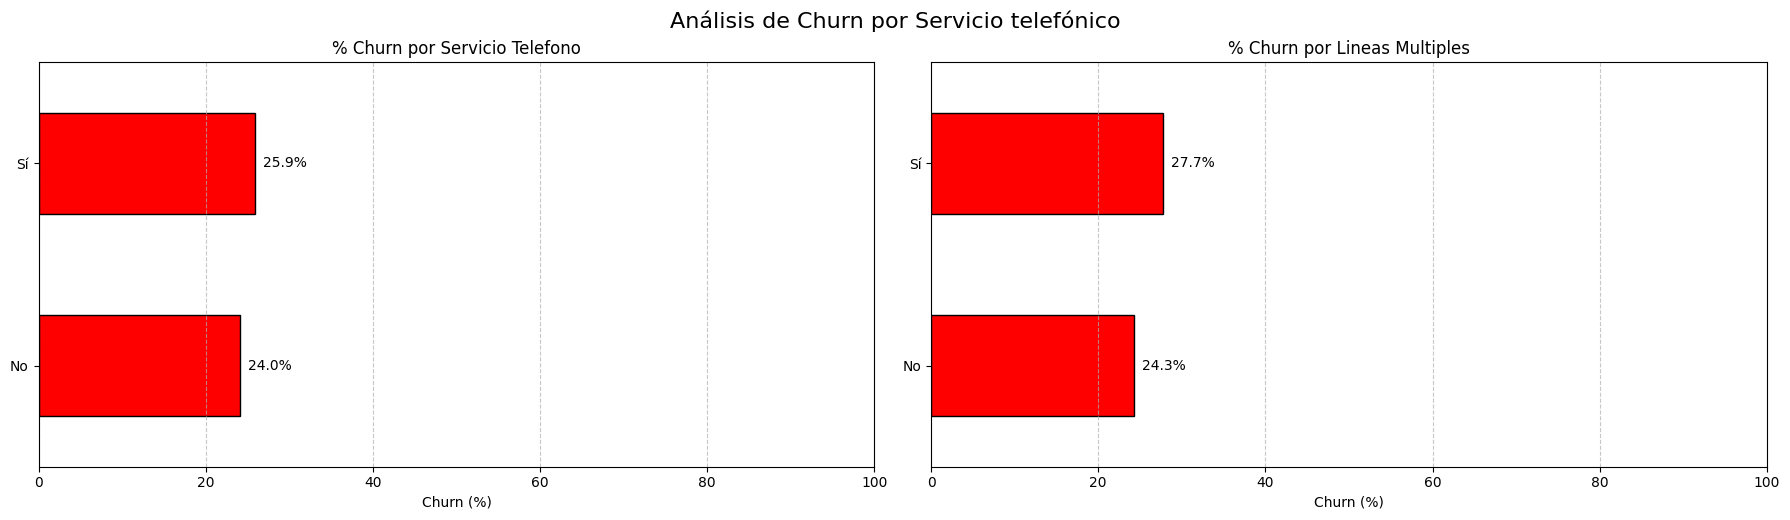

In [77]:
# Variables Análisis de Churn respecto al Servicio Telefónico
variables = ['Servicio_Telefono', 'Lineas_Multiples']

# Diccionario de traducciones
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear figura y ejes (filas, columnas)
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()  # Para recorrer con loop

for i, var in enumerate(variables):
    # Calcular % de churn = 1 por categoría
    grupo = df_final.groupby(var)['Churn'].mean().sort_values() * 100

    # Reemplaza 0 y 1 por 'No' y 'Sí' si todos los índices son numéricos y solo hay dos categorías
    if sorted(grupo.index.unique()) == [0, 1]:
        grupo.index = ['No', 'Sí']
    else:
        # Traducir etiquetas del índice si aplican
        grupo.index = [traducciones.get(x, x) for x in grupo.index]

    # Graficar (después del renombramiento)
    grupo.plot(kind='barh', ax=axes[i], color='Red', edgecolor='black')

    # Títulos y formato
    axes[i].set_title(f'% Churn por {var.replace("_", " ")}')
    axes[i].set_xlabel('Churn (%)')
    axes[i].set_xlim(0, 100)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Agregar texto con %
    for index, value in enumerate(grupo.values):
        axes[i].text(value + 1, index, f'{value:.1f}%', va='center')

# Ajustar layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.suptitle('Análisis de Churn por Servicio telefónico', fontsize=16, y=1.03)

# exportar gráfico
plt.savefig('plt3.churn_serviciotelefono.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()


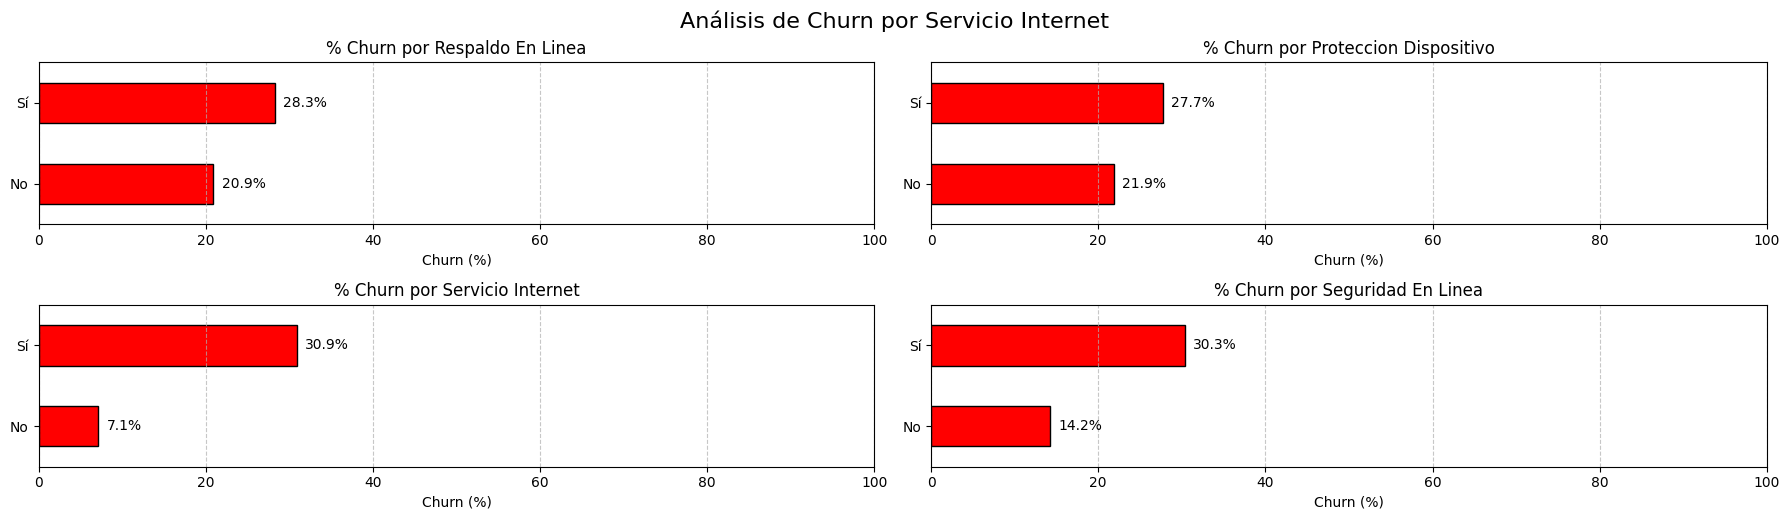

In [78]:
# Variables Análisis de Churn respecto al Servicio Internet
variables = ['Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Servicio_Internet', 'Seguridad_En_Linea', ]

# Diccionario de traducciones
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear figura y ejes (filas, columnas)
fig, axes = plt.subplots(2, 2, figsize=(18, 5))
axes = axes.flatten()  # Para recorrer con loop

for i, var in enumerate(variables):
    # Calcular % de churn = 1 por categoría
    grupo = df_final.groupby(var)['Churn'].mean().sort_values() * 100

    # Reemplaza 0 y 1 por 'No' y 'Sí' si todos los índices son numéricos y solo hay dos categorías
    if sorted(grupo.index.unique()) == [0, 1]:
        grupo.index = ['No', 'Sí']
    else:
        # Traducir etiquetas del índice si aplican
        grupo.index = [traducciones.get(x, x) for x in grupo.index]

    # Graficar (después del renombramiento)
    grupo.plot(kind='barh', ax=axes[i], color='Red', edgecolor='black')

    # Títulos y formato
    axes[i].set_title(f'% Churn por {var.replace("_", " ")}')
    axes[i].set_xlabel('Churn (%)')
    axes[i].set_xlim(0, 100)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Agregar texto con %
    for index, value in enumerate(grupo.values):
        axes[i].text(value + 1, index, f'{value:.1f}%', va='center')

# Ajustar layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.suptitle('Análisis de Churn por Servicio Internet', fontsize=16, y=1.03)

# exportar gráfico
plt.savefig('plt4.churn_serviciointernet.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()


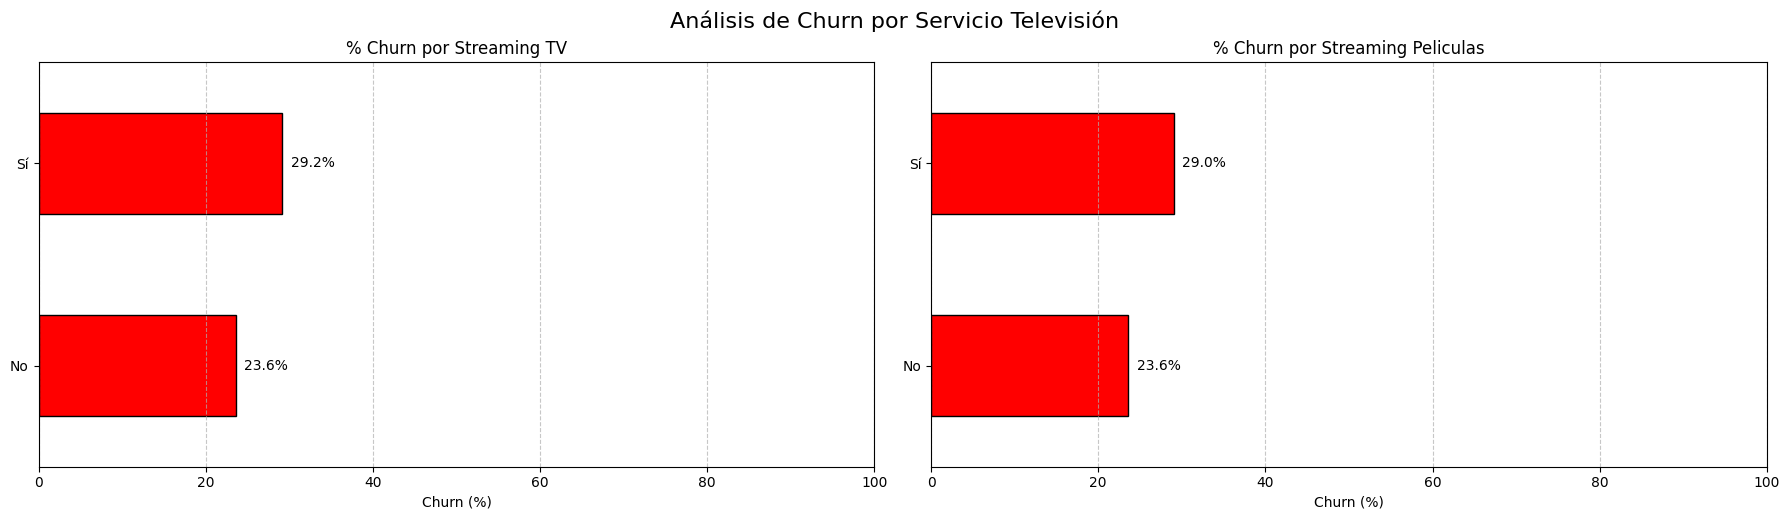

In [81]:
# Variables Análisis de Churn respecto al Servicio Televisión
variables = ['Streaming_TV', 'Streaming_Peliculas']

# Diccionario de traducciones
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear figura y ejes (filas, columnas)
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()  # Para recorrer con loop

for i, var in enumerate(variables):
    # Calcular % de churn = 1 por categoría
    grupo = df_final.groupby(var)['Churn'].mean().sort_values() * 100

    # Reemplaza 0 y 1 por 'No' y 'Sí' si todos los índices son numéricos y solo hay dos categorías
    if sorted(grupo.index.unique()) == [0, 1]:
        grupo.index = ['No', 'Sí']
    else:
        # Traducir etiquetas del índice si aplican
        grupo.index = [traducciones.get(x, x) for x in grupo.index]

    # Graficar (después del renombramiento)
    grupo.plot(kind='barh', ax=axes[i], color='Red', edgecolor='black')

    # Títulos y formato
    axes[i].set_title(f'% Churn por {var.replace("_", " ")}')
    axes[i].set_xlabel('Churn (%)')
    axes[i].set_xlim(0, 100)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Agregar texto con %
    for index, value in enumerate(grupo.values):
        axes[i].text(value + 1, index, f'{value:.1f}%', va='center')

# Ajustar layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.suptitle('Análisis de Churn por Servicio Televisión', fontsize=16, y=1.03)

# exportar gráfico
plt.savefig('plt5.churn_serviciotelevision.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

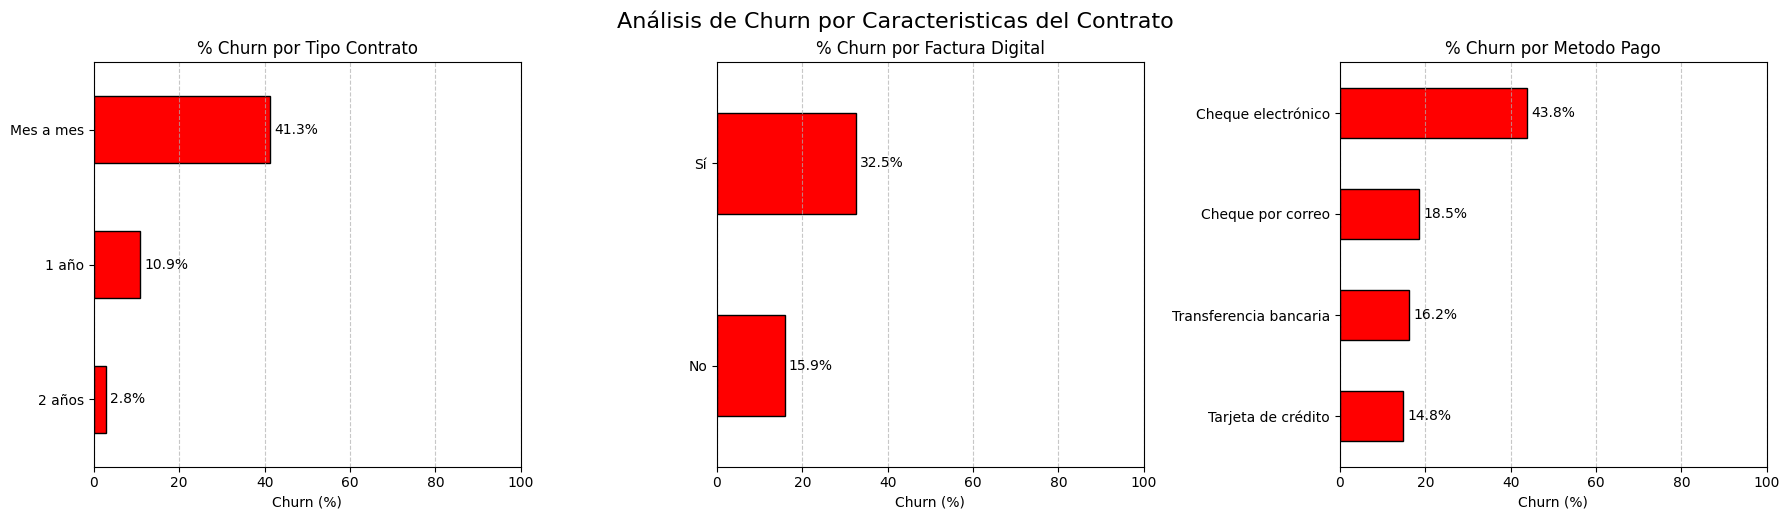

In [82]:
# Variables Análisis de Churn respecto a Caracteristicas del Contrato
variables = ['Tipo_Contrato', 'Factura_Digital','Metodo_Pago']

# Diccionario de traducciones
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear figura y ejes (filas, columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()  # Para recorrer con loop

for i, var in enumerate(variables):
    # Calcular % de churn = 1 por categoría
    grupo = df_final.groupby(var)['Churn'].mean().sort_values() * 100

    # Reemplaza 0 y 1 por 'No' y 'Sí' si todos los índices son numéricos y solo hay dos categorías
    if sorted(grupo.index.unique()) == [0, 1]:
        grupo.index = ['No', 'Sí']
    else:
        # Traducir etiquetas del índice si aplican
        grupo.index = [traducciones.get(x, x) for x in grupo.index]

    # Graficar (después del renombramiento)
    grupo.plot(kind='barh', ax=axes[i], color='Red', edgecolor='black')

    # Títulos y formato
    axes[i].set_title(f'% Churn por {var.replace("_", " ")}')
    axes[i].set_xlabel('Churn (%)')
    axes[i].set_xlim(0, 100)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)

    # Agregar texto con %
    for index, value in enumerate(grupo.values):
        axes[i].text(value + 1, index, f'{value:.1f}%', va='center')

# Ajustar layout para que no se sobrepongan los gráficos
plt.tight_layout()
plt.suptitle('Análisis de Churn por Caracteristicas del Contrato', fontsize=16, y=1.03)

# exportar gráfico
plt.savefig('plt6.churn_caracteristicascontrato.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

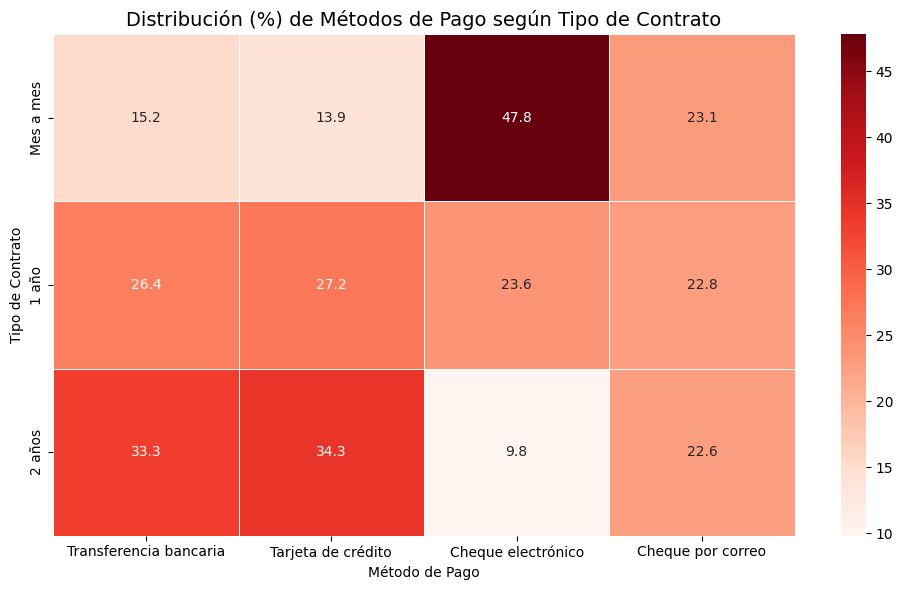

In [83]:
# Análisos de distribución metodo de pago por tipo de contrato

# Diccionario de traducciones
traducciones = {
    'Month-to-month': 'Mes a mes',
     1: 'Si',
     0: 'No',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear tabla cruzada (frecuencia relativa por fila)
cross_tab = pd.crosstab(
    df_final['Tipo_Contrato'],
    df_final['Metodo_Pago'],
    normalize='index'
) * 100

# Traducir índices (filas) y columnas con el diccionario
cross_tab.index = [traducciones.get(x, x) for x in cross_tab.index]
cross_tab.columns = [traducciones.get(x, x) for x in cross_tab.columns]

# Plot como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)

plt.title('Distribución (%) de Métodos de Pago según Tipo de Contrato', fontsize=14)
plt.xlabel('Método de Pago')
plt.ylabel('Tipo de Contrato')
plt.tight_layout()

# exportar grafico

plt.savefig('plt7.distribucion_metodopagotipocontrato.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

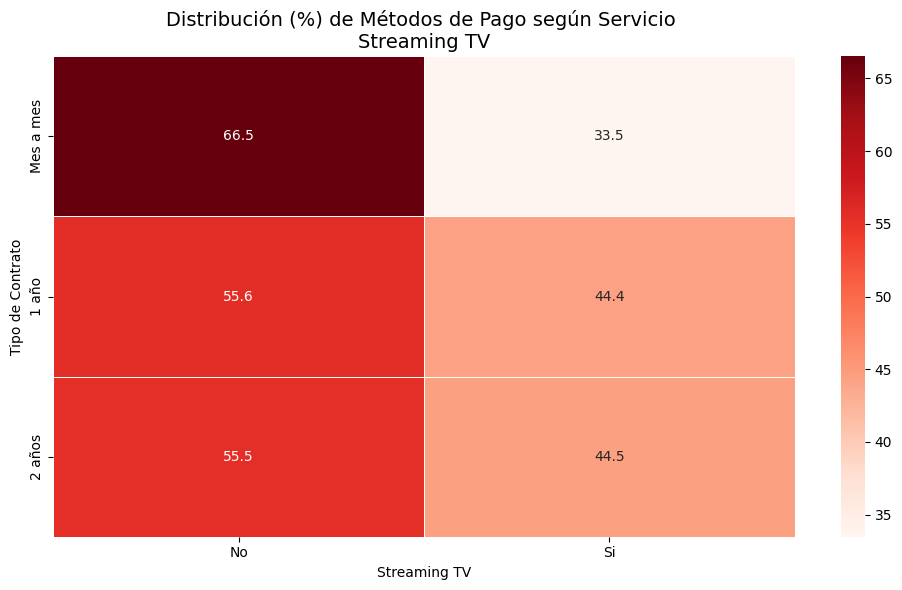

In [84]:
# Distribución (%) de Métodos de Pago según Servicio Streaming TV
# Diccionario de traducciones
traducciones = {
    'Month-to-month': 'Mes a mes',
     1: 'Si',
     0: 'No',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear tabla cruzada (frecuencia relativa por fila)
cross_tab = pd.crosstab(
    df_final['Tipo_Contrato'],
    df_final['Streaming_TV'],
    normalize='index'
) * 100

# Traducir índices (filas) y columnas con el diccionario
cross_tab.index = [traducciones.get(x, x) for x in cross_tab.index]
cross_tab.columns = [traducciones.get(x, x) for x in cross_tab.columns]

# Plot como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)

plt.title('Distribución (%) de Métodos de Pago según Servicio \nStreaming TV', fontsize=14)
plt.xlabel('Streaming TV')
plt.ylabel('Tipo de Contrato')
plt.tight_layout()

# exportar gráfico
plt.savefig('plt8.distribucion_metodopagostreamingtv.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

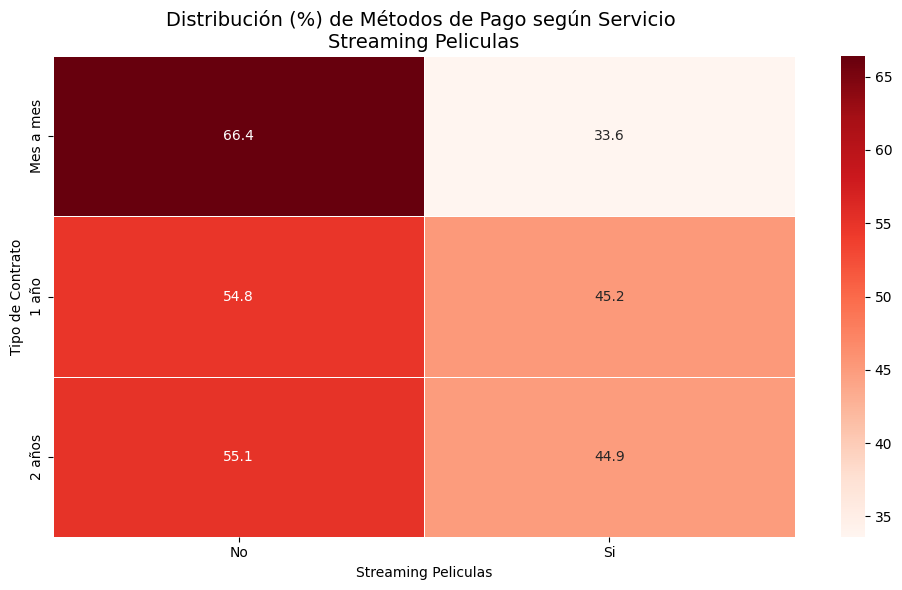

In [87]:
# Distribución (%) de Métodos de Pago según Servicio Streaming Peliculas
# Diccionario de traducciones
traducciones = {
    'Month-to-month': 'Mes a mes',
     1: 'Si',
     0: 'No',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito'
}

# Crear tabla cruzada (frecuencia relativa por fila)
cross_tab = pd.crosstab(
    df_final['Tipo_Contrato'],
    df_final['Streaming_Peliculas'],
    normalize='index'
) * 100

# Traducir índices (filas) y columnas con el diccionario
cross_tab.index = [traducciones.get(x, x) for x in cross_tab.index]
cross_tab.columns = [traducciones.get(x, x) for x in cross_tab.columns]

# Plot como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)

plt.title('Distribución (%) de Métodos de Pago según Servicio \nStreaming Peliculas', fontsize=14)
plt.xlabel('Streaming Peliculas')
plt.ylabel('Tipo de Contrato')
plt.tight_layout()

# exportar gráfico
plt.savefig('plt9.distribucion_metodopagostreamingpeliculas.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()

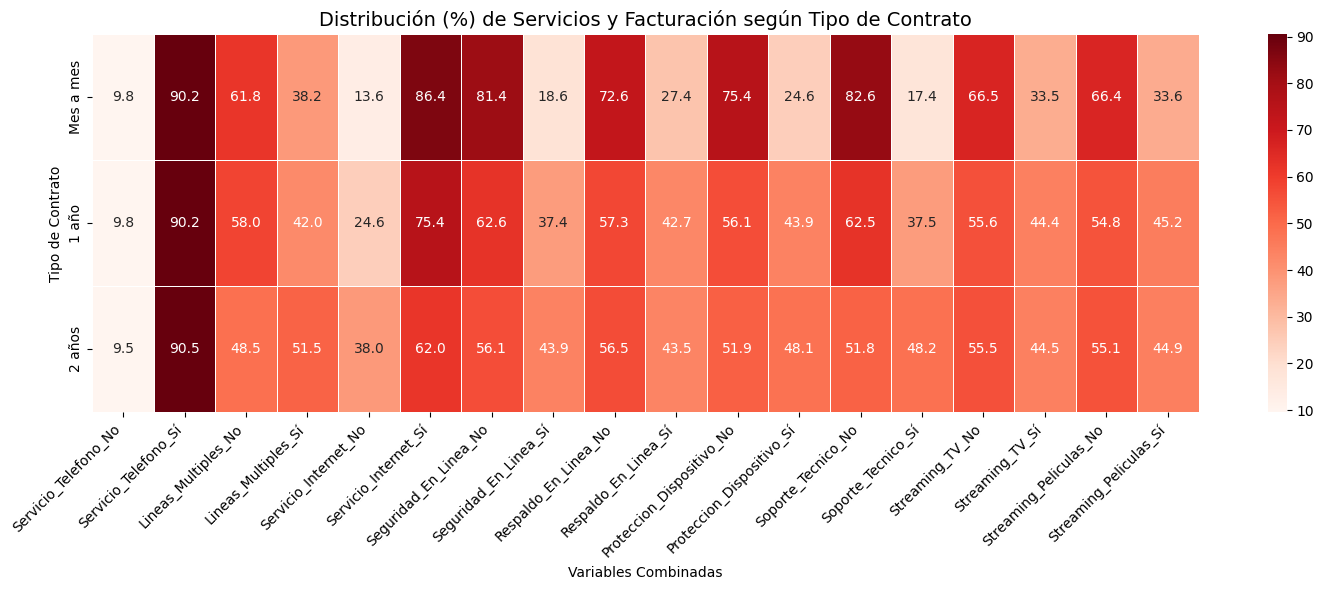

In [63]:
# Heatmap
# Diccionario de traducciones
traducciones = {
    'Month-to-month': 'Mes a mes',
    'One year': '1 año',
    'Two year': '2 años',
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer': 'Transferencia bancaria',
    'Credit card': 'Tarjeta de crédito',
    1: 'Sí',
    0: 'No'
}

# variables a cruzar como columnas
columnas = ['Servicio_Telefono',
'Lineas_Multiples',
'Servicio_Internet',
'Seguridad_En_Linea',
'Respaldo_En_Linea',
'Proteccion_Dispositivo',
'Soporte_Tecnico',
'Streaming_TV',
'Streaming_Peliculas']

# variable base para las filas
fila = 'Tipo_Contrato'

# Generar y juntar todos los crosstab normalizados por fila
crosstabs = []
for col in columnas:
    ct = pd.crosstab(df_final[fila], df_final[col], normalize='index') * 100
    # Renombrar columnas para evitar duplicados y dar contexto
    ct.columns = [f"{col}_{traducciones.get(x, x)}" for x in ct.columns]
    crosstabs.append(ct)

# Concatenar todas horizontalmente
cross_tab_completo = pd.concat(crosstabs, axis=1)

# Traducir índices (filas)
cross_tab_completo.index = [traducciones.get(x, x) for x in cross_tab_completo.index]

# Graficar heatmap final
plt.figure(figsize=(15, 6))
sns.heatmap(cross_tab_completo, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)

plt.title('Distribución (%) de Servicios y Facturación según Tipo de Contrato', fontsize=14)
plt.xlabel('Variables Combinadas')
plt.ylabel('Tipo de Contrato')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

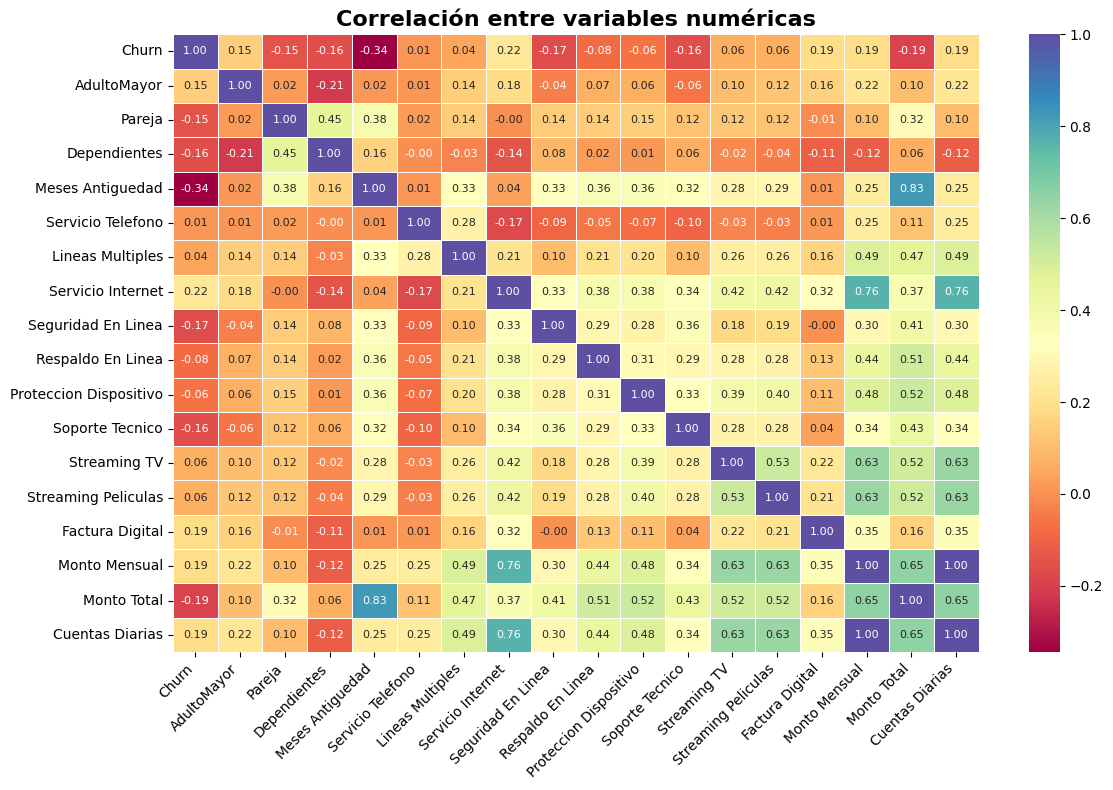

In [88]:
# Seleccionar solo columnas numéricas del DataFrame
df_numericas = df_final.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Reemplazar guiones bajos por espacios en nombres de columnas e índices
matriz_correlacion.rename(
    columns=lambda x: x.replace('_', ' '),
    index=lambda x: x.replace('_', ' '),
    inplace=True
)

# Plot del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    annot_kws={'size': 8},
    cmap="Spectral",
    linewidths=0.5
)

plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', loc='center')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# exportar gráfico

plt.savefig('plt10.correlacion_variablesnumericas.png',transparent=True,dpi=300,bbox_inches='tight')

plt.show()




#📄Informe final